In [1]:
%matplotlib inline

In [2]:
from json_log_reader import *
from matplotlib.pyplot import *
from pandas import *
from analysis.plot_tools import *
from analysis.statistics import *

In [3]:
data_by_message = read_all_files(data_dir)
print('\n'.join(str(group) for group in data_by_message))

('INFO', 'Begin Trial!')
('INFO', 'Comm')
('INFO', 'End Trial')
('INFO', 'Query Step')
('INFO', 'State-Action')


In [4]:
query_data = data_by_message[('INFO', 'Query Step')]
print(query_data.columns)

Index(['Query', 'Response', 'Trial', 'levelname', 'message', 'timestamp',
       'process_no', 'scenario_id', 'heuristic_id', 'comm_branch_factor',
       'comm_iterations', 'comm_cost', 'plan_iterations', 'experience',
       'trials'],
      dtype='object')


In [5]:
comm_end_data = data_by_message[('INFO','Comm')]
print(comm_end_data.columns)

Index(['Action', 'EV', 'How', 'New Action', 'Original Action', 'Trial', 'Type',
       'levelname', 'message', 'timestamp', 'process_no', 'scenario_id',
       'heuristic_id', 'comm_branch_factor', 'comm_iterations', 'comm_cost',
       'plan_iterations', 'experience', 'trials'],
      dtype='object')


In [6]:
for group, groupdf in comm_end_data.groupby(paramlist):
    print(group)
    print(groupdf[['EV', 'Trial','Type']])

(12, 1, 1, 3, 100, 1, 100, 1000, 50)
             EV  Trial   Type
1      0.000000      0  Begin
3      0.000000      0  Begin
5      0.000000      0  Begin
7     99.988993      0  Begin
11    99.998984      0    End
13    99.998984      0  Begin
17    99.999911      0    End
19    99.999978      0  Begin
20   100.000000      0    End
24     0.000000      1  Begin
26     0.000000      1  Begin
28     0.000000      1  Begin
30     0.000000      1  Begin
32     0.000000      1  Begin
34     0.000000      1  Begin
38     0.000000      2  Begin
40     0.000000      2  Begin
42     0.000000      2  Begin
44     0.000000      2  Begin
46     0.000000      2  Begin
48     0.000000      2  Begin
52     0.000000      3  Begin
54     0.000000      3  Begin
56     0.000000      3  Begin
58    99.988993      3  Begin
62    99.996378      3    End
64    99.999095      3  Begin
70    99.999897      3    End
72   100.000000      3  Begin
76     0.000000      4  Begin
..          ...    ...    ...
761

In [7]:
for group, groupdf in comm_end_data.groupby(paramlist):
    print(group)
    print(groupdf.loc[groupdf['Type'] == 'End'][['EV', 'Trial','Type']])

(12, 1, 1, 3, 100, 1, 100, 1000, 50)
             EV  Trial Type
11    99.998984      0  End
17    99.999911      0  End
20   100.000000      0  End
62    99.996378      3  End
70    99.999897      3  End
101   99.997041      5  End
104   99.999984      5  End
107   99.999999      5  End
135   99.997460      7  End
138   99.999972      7  End
141   99.999997      7  End
156   99.996847      8  End
161   99.999938      8  End
188   74.085904     10  End
195   96.551943     10  End
202  100.000000     10  End
246   59.408342     13  End
255   49.999790     13  End
259   49.999999     13  End
303   99.998816     16  End
309   99.999844     16  End
312   99.999999     16  End
382   99.997041     21  End
385   99.999967     21  End
388   99.999996     21  End
414   99.998871     23  End
419   99.999887     23  End
425   99.999998     23  End
455   99.998793     25  End
461   99.999921     25  End
464  100.000000     25  End
590   99.997460     34  End
593   99.999972     34  End
596   99.99

              EV  Trial Type
9      88.022875      0  End
17     49.999824      0  End
22     50.000000      0  End
28     50.000000      0  End
32    100.000000      0  End
72     88.022875      3  End
78     99.999861      3  End
83     99.999999      3  End
86    100.000000      3  End
90    100.000000      3  End
102    90.149510      4  End
114   100.000000      4  End
133    89.717284      5  End
141    49.999943      5  End
145    50.000000      5  End
149    50.000000      5  End
152   100.000000      5  End
164    47.805066      6  End
198    71.769251      8  End
205    98.741990      8  End
213    49.999999      8  End
217    50.000000      8  End
221    50.000000      8  End
237    49.997938      9  End
244    49.999999      9  End
250    50.000000      9  End
254   100.000000      9  End
266    89.851391     10  End
286    38.095771     11  End
293    99.999958     11  End
...          ...    ...  ...
1029  100.000000     39  End
1053   35.778846     41  End
1061   55.8812

In [8]:
comm_end_data['Step'] = comm_end_data.groupby(paramlist + ['Trial']).cumcount()

process_no  scenario_id  heuristic_id  comm_branch_factor  comm_iterations  comm_cost  plan_iterations  experience  trials  Trial
12          1            1             3                   100              1          100              1000        50      0        AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            1        AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            2        AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            3        AxesSubplot(0.125,0.125;0.775x0.755)
                                                                                                                            4        AxesSubplot(0.125,0.125;0.775x0.755)
                    

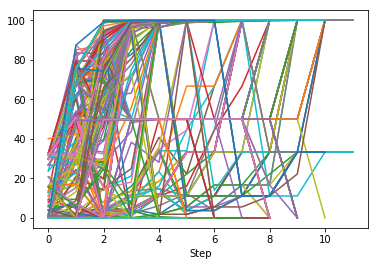

In [9]:
comm_end_data.groupby(paramlist + ['Trial']).plot(x='Step', y='EV', ax=subplot(1,1,1), legend=False)

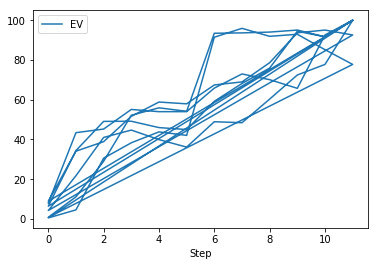

In [10]:
comm_end_data[comm_end_data['process_no'] == 13].groupby(['heuristic_id','Step'], as_index=False)['EV'].aggregate(np.mean).plot(x='Step',y='EV')

In [11]:
end_step_data = data_by_message[('INFO','End Trial')]

In [12]:
end_step_data = end_step_data[(end_step_data['process_no'] == 13)]
heuristic_ids = np.unique(end_step_data['heuristic_id'])
print(heuristic_ids)

[ 1  3  4  7  9 10]


In [13]:
data = [end_step_data[end_step_data['heuristic_id'] == id]['Reward'].values for id in heuristic_ids]
print(data[0])

[100. 100. 100.   0. 100.   0.   0.   0.   0. 100.   0. 100. 100.   0.
   0.   0. 100. 100. 100. 100.   0. 100.   0. 100. 100.   0. 100.   0.
   0.   0.   0. 100. 100. 100. 100.   0. 100.   0. 100.   0.   0.   0.
   0. 100.   0. 100.   0. 100. 100.   0.]


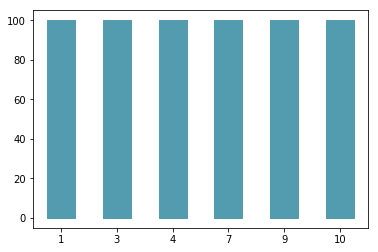

In [14]:
boxplot(x_data=heuristic_ids, y_data=data)

In [21]:
data = end_step_data.groupby(['heuristic_id', 'Reward'], as_index=False).size().reset_index(name='counts')
data['p'] = data['counts']/50
data['std'] = np.sqrt(data['p'] * (1 - data['p']) / 50)
print(data[data['Reward'] == 100.0])

    heuristic_id  Reward  counts     p       std
1              1   100.0      25  0.50  0.070711
3              3   100.0      22  0.44  0.070200
5              4   100.0      28  0.56  0.070200
7              7   100.0      26  0.52  0.070654
9              9   100.0      30  0.60  0.069282
11            10   100.0      22  0.44  0.070200


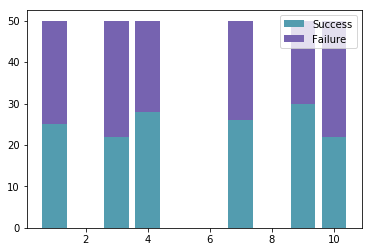

In [17]:
stackedbarplot(x_data=heuristic_ids,
               y_data_list=[data[data['Reward'] == 100.0]['counts'], data[data['Reward'] == 0.0]['counts']],
               y_data_names = ['Success', 'Failure'])